In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
df_2014 = pd.read_csv("../data/raw/CDSarchive201403/Reference_CCAProfiles_2008_2012.csv")
df_2015 = pd.read_csv("../data/raw/CDSarchive201508/Reference_CCAProfiles_2009_2013.csv")
df_2016 = pd.read_csv("../data/raw/CDSarchive201606/Reference_CCAProfiles_2010_2014.csv")
df_2017 = pd.read_csv("../data/raw/CDSarchive201706/Reference_CCAProfiles_2011_2015.csv")
df_2018 = pd.read_csv("../data/raw/CDSarchive201811/Reference_CCAProfiles_2012_2016.csv")
df_2019 = pd.read_csv("../data/raw/CDSarchive201906/Reference_CCAProfiles_2013_2017.csv")
df_2020 = pd.read_csv("../data/raw/CDSarchive202007/ReferenceCCAProfiles20142018.csv")

In [16]:
# starting analysis with these columns
need_columns= ['GEOG', '2000_POP', '2010_POP', 'TOT_POP', 'YEAR', 'MEDINC', 'EMP', 'IN_LBFRC', 'OWN_OCC_HU', 
               'RENT_OCC_HU', 'VAC_HU', 'TOT_HH', 'HU_SNG_DET', 'HU_SNG_ATT', 'HU_2UN', 'HU_3_4UN', 'HU_GT_5UN', 
               'MED_HA', 'BR_0_1', 'BR_2', 'BR_3', 'BR_4', 'BR_5','WHITE', 'HISP', 'BLACK', 'ASIAN', 'OTHER']

In [458]:
#df_2020.drop(df_2020[df_2020['GEOG'].isna()].index, inplace=True)
#df_2020['HU_GT_5UN'] =  df_2020['HU_5_9UN'] + df_2020['HU_GT_19UN']

In [17]:
all_dfs ={2014: df_2014, 
          2015: df_2015, 
          2016: df_2016, 
          2017: df_2017,
          2018: df_2018,
          2019: df_2019,
          2020: df_2020}

years = [x for x in range(2014,2021)]

### Initial data cleaning

In [18]:
rename_columns = {"CCA": "GEOG",
                 'RNT_OCC_HU': 'RENT_OCC_HU',
                  'MED_INC' : 'MEDINC'
                 }
df_list = []
for y in years:
    df = all_dfs[y]
    ycol = [y]*len(df)
    df['YEAR'] = ycol
    df = df.rename(columns=rename_columns)
    
    c = df.columns.to_list()
    df = df.drop(columns=list(set(c) - set(need_columns)))

    df_list.append(df)
    df.to_csv("../data/clean/{}.csv".format(y))

In [19]:
for df in df_list:
    print(1)
    try:
        df[need_columns]
    except:
        print("missing")

1
1
1
1
1
1
1


In [20]:
df_all_data = pd.concat(df_list)
df_all_data.shape

(539, 28)

### Feature generation

##### predictor columns
- unemployment rate
- race
- median income
- income index relative to city overall?
- % rented housing units
- % owned housing units
- % or number vacant
- housing type
- housing age
- housing size


In [21]:
employment_rate = df_all_data['EMP']/df_all_data['IN_LBFRC']
df_all_data['EMP_RATE'] = employment_rate

In [22]:
race_columns = ['WHITE', 'HISP', 'BLACK', 'ASIAN', 'OTHER']

for race in race_columns:
    pct = df_all_data[race]/df_all_data['TOT_POP']
    name = race + "_PCT"
    df_all_data[name] = pct

In [23]:
rnt_own_columns = ['OWN_OCC_HU', 'RENT_OCC_HU', 'VAC_HU']

for r in rnt_own_columns:
    pct = df_all_data[r]/df_all_data['TOT_HH']
    name = r + "_PCT"
    df_all_data[name] = pct

In [24]:
df_all_data.to_csv("../data/clean/clean_data.csv")

### Exploring the data

In [410]:
df_inc_chg = pd.DataFrame({'INC_CHG': df_2020['MEDINC'] - df_2014['MEDINC'],
                          'POP_CHG': df_2020['TOT_POP']- df_2014['TOT_POP']}).sort_values(by='INC_CHG')

In [427]:
from sklearn.linear_model import LinearRegression

x = df_inc_chg['INC_CHG'].to_numpy().reshape(-1,1)
y = df_inc_chg['POP_CHG'].to_numpy()#.reshape(1,-1)

pop_model = LinearRegression()
pop_model.fit(x,y)
y_predict = pop_model.predict(x)

Text(0.5, 1.0, 'Population change as function of \nincome change, by neighborhood')

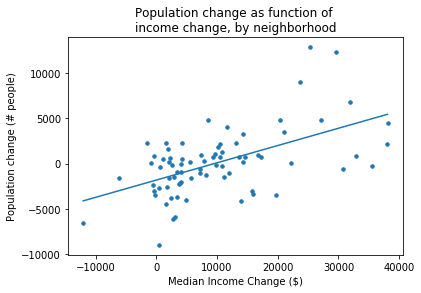

In [453]:
plt.scatter(df_inc_chg['INC_CHG'], df_inc_chg['POP_CHG'], s=12)
plt.plot(x, y_predict)
plt.xlabel("Median Income Change ($)")
plt.ylabel("Population change (# people)")
plt.title("Population change as function of \nincome change, by neighborhood")

In [41]:
df_2014['WHITE']

0     15844.000000
1      2995.061630
2      1560.087638
3      7152.000000
4       135.000000
          ...     
72     5514.000000
73      390.481385
74    31779.000000
75    48721.000000
76     1630.000000
Name: WHITE, Length: 77, dtype: float64

In [39]:
df_race_by_year #- df_race_by_year.shift(1)

,WHITE,HISP,BLACK,ASIAN,OTHER
YEAR,,,,,
2014,8.651525e+05,7.681103e+05,8.777990e+05,1.485548e+05,17687.947898
2015,8.951024e+06,3.700686e+06,2.907788e+06,1.067108e+06,292930.000000
2016,8.723740e+05,7.852760e+05,8.529830e+05,1.542850e+05,47270.000000
2017,8.750650e+05,7.906180e+05,8.398500e+05,1.602860e+05,50995.000000
2018,8.775320e+05,7.905220e+05,8.292190e+05,1.634830e+05,52394.000000
2019,8.901510e+05,7.896970e+05,8.195850e+05,1.675240e+05,54777.000000
2020,8.920981e+05,7.880956e+05,8.077477e+05,1.729269e+05,56919.793577


In [25]:
race_columns = ['WHITE', 'HISP', 'BLACK', 'ASIAN', 'OTHER']
df_race_by_year = df_all_data.groupby(by='YEAR').sum()[race_columns] 
df_race_chg = (df_race_by_year - df_race_by_year.shift(1)).cumsum()

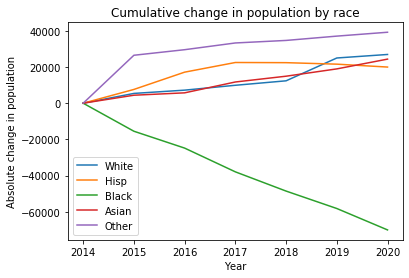

In [26]:
for race in race_columns:
    r = race.capitalize()
    a = df_race_chg[race].to_numpy()
    a[0] = 0
    plt.plot(years, a, label=r)

plt.xlabel('Year')
plt.ylabel('Absolute change in population')
#plt.ylim([-35000,25000])
plt.legend()
t = plt.title("Cumulative change in population by race")